
	Pearson's product-moment correlation

data:  log2(filtered_fpkm$Mock_Col_rna) and log2(filtered_fpkm$Mock_Col_ribo)
t = 201.49, df = 14846, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8513461 0.8599614
sample estimates:
      cor 
0.8557131 


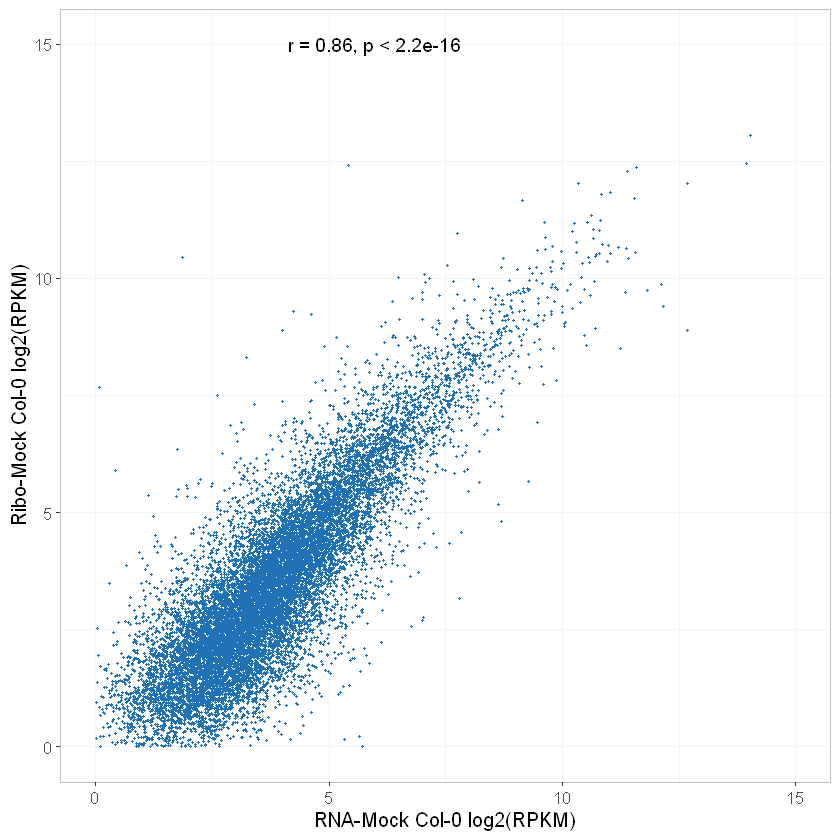

In [21]:
# Supplementary Fig. 1b

library(data.table)
library(ggplot2)

fpkm <- read.csv("data/fpkm_mean.txt",header=T,sep="\t",row.names=1)
#head(fpkm)

# filter 0
filtered_fpkm <- fpkm[fpkm$Mock_Col_rna > 0 & fpkm$Mock_Col_ribo > 0, ]
# calculate correlation
cor.test(log2(filtered_fpkm$Mock_Col_rna), log2(filtered_fpkm$Mock_Col_ribo))

#pdf("S1_Mock_g7g8_RNA_Ribo_correlation.pdf",width = 2.7,height = 2.7)
ggplot(filtered_fpkm, aes(x = log2(Mock_Col_rna), y = log2(Mock_Col_ribo))) +
  geom_point(color="#2172b4",size=0.5) +
  xlim(0,15)+
  ylim(0,15)+
  xlab("RNA-Mock Col-0 log2(RPKM)") +
  ylab("Ribo-Mock Col-0 log2(RPKM)") +
  theme(panel.background = element_blank(),
        panel.border = element_rect(fill = NA,color = "grey"),
        panel.grid = element_line(color = "#f4f4f4"),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10))+
  annotate("text",x=6,y=15,label=c("r = 0.86, p < 2.2e-16"),size=4)
#dev.off()


	Pearson's product-moment correlation

data:  log2(filtered_fpkm$ABA_Col_rna) and log2(filtered_fpkm$ABA_Col_ribo)
t = 175.44, df = 14846, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8160387 0.8265085
sample estimates:
      cor 
0.8213428 


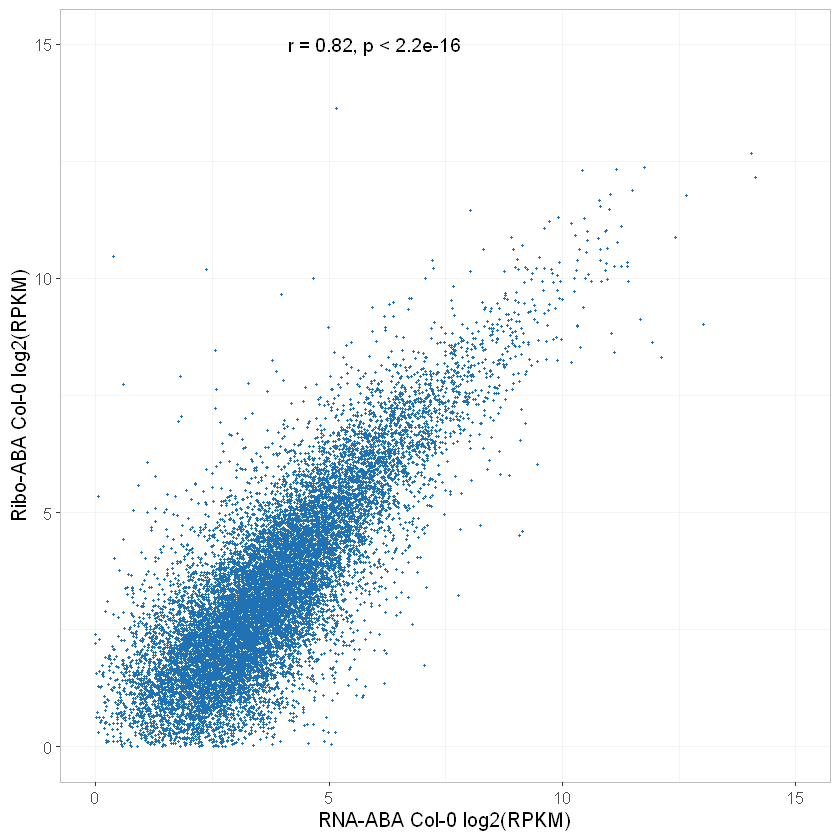

In [25]:
filtered_fpkm <- fpkm[fpkm$ABA_Col_rna > 0 & fpkm$ABA_Col_ribo > 0, ]
cor.test(log2(filtered_fpkm$ABA_Col_rna), log2(filtered_fpkm$ABA_Col_ribo))

#pdf("S1_ABA_g7g8_RNA_Ribo_correlation.pdf",width = 2.7,height = 2.7)
ggplot(filtered_fpkm, aes(x = log2(ABA_Col_rna), y = log2(ABA_Col_ribo))) +
  geom_point(color="#2172b4",size=0.5) +
  xlim(0,15)+
  ylim(0,15)+
  xlab("RNA-ABA Col-0 log2(RPKM)") +
  ylab("Ribo-ABA Col-0 log2(RPKM)") +
  theme(panel.background = element_blank(),
        panel.border = element_rect(fill = NA,color = "grey"),
        panel.grid = element_line(color = "#f4f4f4"),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10))+
  annotate("text",x=6,y=15,label=c("r = 0.82, p < 2.2e-16"),size=4)
#dev.off()

In [ ]:
# Supplementary Fig. 1c

mrna = read.csv("data/RNA.rawcount.txt.ABA-Col0_vs_Mock-Col0.DESeq2.txt",header=T,sep="\t",row.names=1)
TE = read.csv("data/xtail_ABA_Col_vs_Mock_Col.txt",header=T,sep="\t",row.names=1)

#head(mrna)
#head(TE)
mrna_sig_up = mrna[mrna$log2FoldChange > 0 & mrna$padj < 0.05,]
mrna_sig_down = mrna[mrna$log2FoldChange < 0 & mrna$padj < 0.05,]

TE_sig_up = TE[TE$log2FC_TE_final > 0 & TE$pvalue.adjust < 0.05,]
TE_sig_down = TE[TE$log2FC_TE_final < 0 & TE$pvalue.adjust < 0.05,]

length(rownames(mrna_sig_up))
length(rownames(mrna_sig_down))
length(rownames(TE_sig_up))
length(rownames(TE_sig_down))


library(data.table)
library(stringr)
library(clusterProfiler)
library(org.At.tair.db)
library(ggplot2)


t2n <- fread("data/t2n-zj.txt",header = F,sep = "\t")
t2g <- fread("data/t2g-zj.txt",header = F,sep = "\t")

mydf <- data.frame(Entrez = c(rownames(mrna_sig_up), rownames(mrna_sig_down),rownames(TE_sig_up),rownames(TE_sig_down)), 
                   group = c(rep("mrna_up", length(rownames(mrna_sig_up))), rep("mrna_down", length(rownames(mrna_sig_down))), rep("ribo_up", length(rownames(TE_sig_up))),rep("ribo_down", length(rownames(TE_sig_down)))))

compare_result <- compareCluster(Entrez ~ group, data = mydf,fun = "enricher",TERM2GENE = t2g,TERM2NAME = t2n, pvalueCutoff = 0.05)
compare_result@compareClusterResult$Cluster <- factor(compare_result@compareClusterResult$Cluster, levels = c("mrna_up", "mrna_down","ribo_up","ribo_down"))
#write.table(compare_result@compareClusterResult, "Col_Mock_ABA_TE_only_gene_up_down_GO.txt", sep = "\t", quote = F, row.names = F)

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


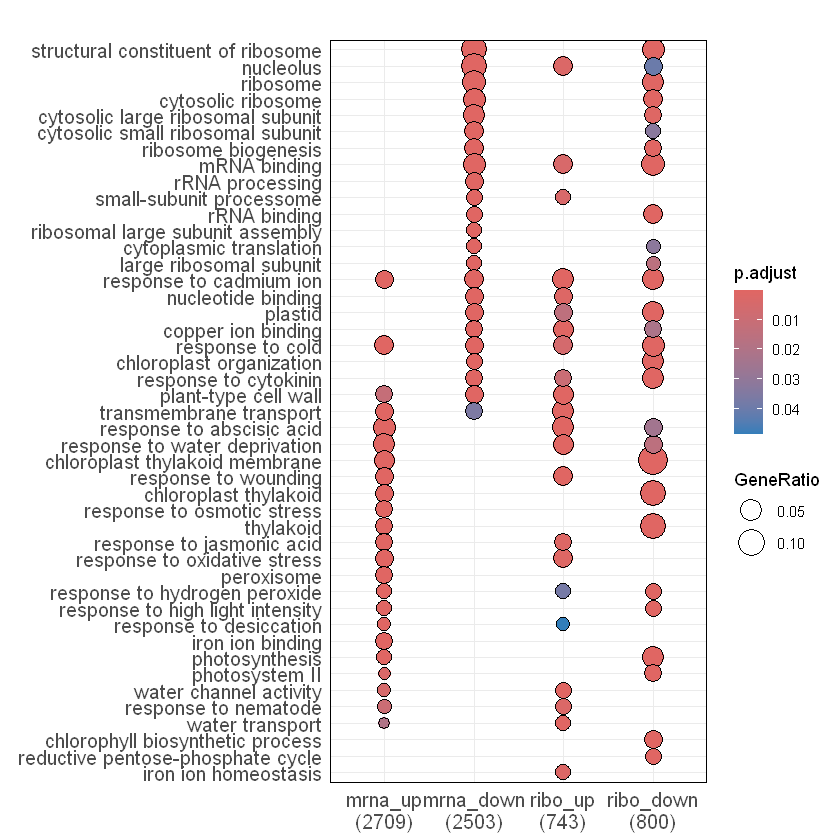

In [14]:

#pdf("sup_fig1c_GO_1.pdf",width = 6,height = 7)
dotplot(compare_result, showCategory = 15) +
  theme_minimal() +
  theme(panel.border = element_rect(color = "black", fill = NA, linewidth = 0.3), axis.text.y = element_text(size = 12), axis.text.x = element_text(size = 12)) +
  xlab(NULL)+
  scale_y_discrete(labels=function(y) str_wrap(y, width=100))
#dev.off()